# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv("bank.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 10)
['loan_applicant_id', 'age', 'education', 'years_with_current_employer', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt', 'y']


In [3]:
data.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [4]:
data['education'].unique()

array(['university.degree', 'high.school', 'illiterate', 'basic',
       'professional.course'], dtype=object)

In [5]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

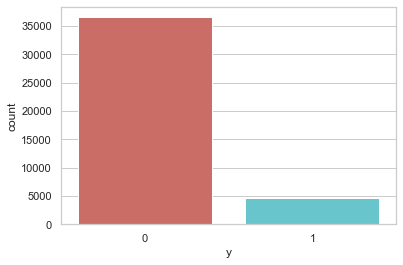

In [6]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [7]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 88.73458288821988
 percentage of default 11.265417111780131


In [8]:
data.groupby('y').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
y,,,,,,,,
0,22914.5,37.975676,13.447521,15.497729,128.300646,15.514879,7.810996,12.127154
1,2320.5,38.261207,14.356034,14.500000,229.554957,21.810028,23.489629,26.605214


In [9]:
data.groupby('education').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
education,,,,,,,,,
basic,20715.466902,37.926138,13.452422,15.372353,139.645291,16.259856,9.623007,13.578631,0.112558
high.school,20496.678068,38.027093,13.585877,15.314944,139.625598,16.192938,9.512649,13.766241,0.112296
illiterate,20381.154156,38.010513,13.483130,15.424694,139.980562,16.270517,9.645607,13.962909,0.116137
professional.course,20543.622328,38.135690,13.641278,15.310860,138.129981,16.138116,9.343046,13.543704,0.109208
university.degree,20828.736579,37.941197,13.585645,15.501012,141.127128,16.258214,9.758195,13.936749,0.113082


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

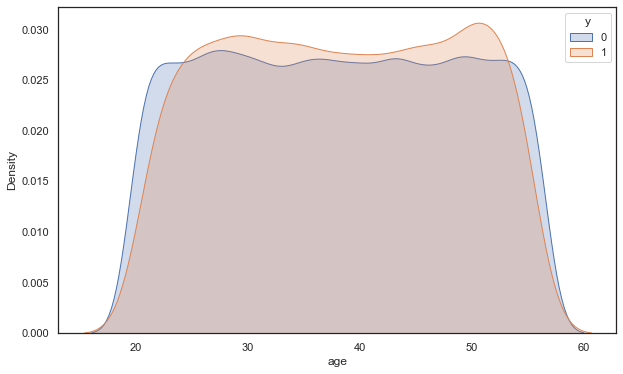

In [10]:
import seaborn as sns
sns.set(style="white")
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0 , 6.0)
sns.kdeplot( data['age'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['age'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [11]:
data['age'].loc[data['y'] == 0].describe()

count    36548.000000
mean        37.975676
std         10.686491
min         20.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         56.000000
Name: age, dtype: float64

In [12]:
data['age'].loc[data['y'] == 1].describe()

count    4640.000000
mean       38.261207
std        10.112340
min        21.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        55.000000
Name: age, dtype: float64

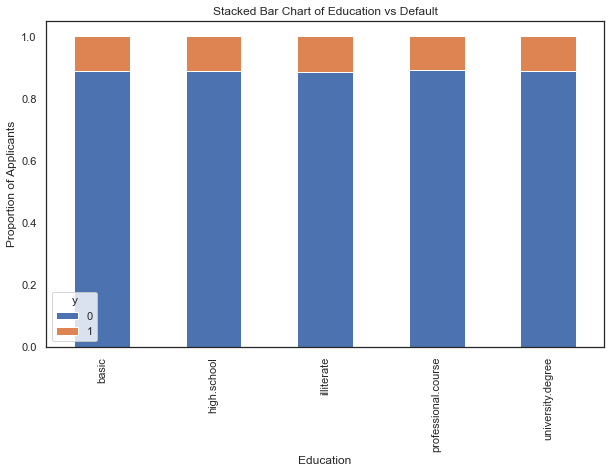

In [13]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Default')
plt.xlabel('Education')
plt.ylabel('Proportion of Applicants')
plt.savefig('education_vs_def_stack')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='years_with_current_employer', ylabel='Density'>

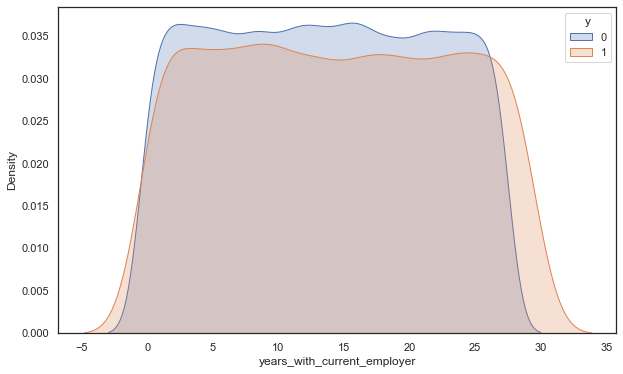

In [14]:
sns.kdeplot( data['years_with_current_employer'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['years_with_current_employer'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [15]:
data['years_with_current_employer'].loc[data['y'] == 0].describe()

count    36548.000000
mean        13.447521
std          8.063183
min          0.000000
25%          6.000000
50%         13.000000
75%         20.000000
max         27.000000
Name: years_with_current_employer, dtype: float64

In [16]:
data['years_with_current_employer'].loc[data['y'] == 1].describe()

count    4640.000000
mean       14.356034
std         8.722690
min         0.000000
25%         7.000000
50%        14.000000
75%        22.000000
max        29.000000
Name: years_with_current_employer, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='years_at_current_address', ylabel='Density'>

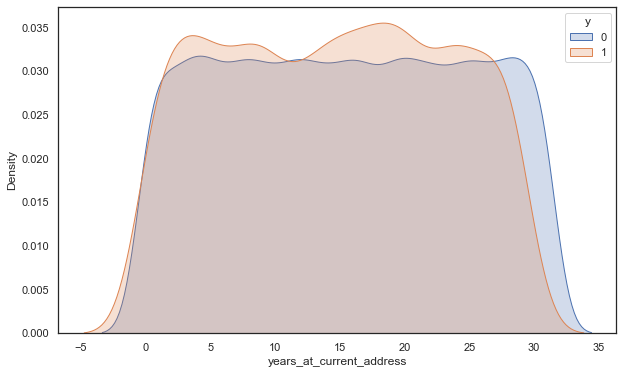

In [17]:
sns.kdeplot( data['years_at_current_address'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['years_at_current_address'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [18]:
data['years_at_current_address'].loc[data['y'] == 0].describe()

count    36548.000000
mean        15.497729
std          9.245698
min          0.000000
25%          7.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: years_at_current_address, dtype: float64

In [19]:
data['years_at_current_address'].loc[data['y'] == 1].describe()

count    4640.000000
mean       14.500000
std         8.637087
min         0.000000
25%         7.000000
50%        15.000000
75%        22.000000
max        29.000000
Name: years_at_current_address, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='household_income', ylabel='Density'>

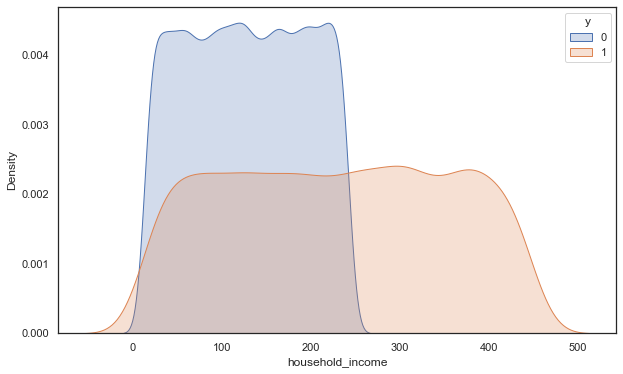

In [20]:
sns.kdeplot( data['household_income'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['household_income'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [21]:
data['household_income'].loc[data['y'] == 0].describe()

count    36548.000000
mean       128.300646
std         66.317774
min         14.000000
25%         71.000000
50%        128.000000
75%        186.000000
max        242.000000
Name: household_income, dtype: float64

In [22]:
data['household_income'].loc[data['y'] == 1].describe()

count    4640.000000
mean      229.554957
std       124.486932
min        14.000000
25%       122.000000
50%       231.000000
75%       336.000000
max       446.000000
Name: household_income, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='debt_to_income_ratio', ylabel='Density'>

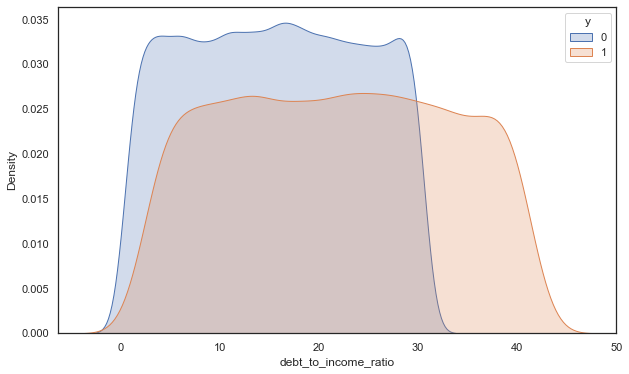

In [23]:
sns.kdeplot( data['debt_to_income_ratio'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['debt_to_income_ratio'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [24]:
data['debt_to_income_ratio'].loc[data['y'] == 0].describe()

count    36548.000000
mean        15.514879
std          8.664839
min          0.400386
25%          8.040746
50%         15.530198
75%         22.934795
max         30.599571
Name: debt_to_income_ratio, dtype: float64

In [25]:
data['debt_to_income_ratio'].loc[data['y'] == 1].describe()

count    4640.000000
mean       21.810028
std        11.108836
min         2.407115
25%        12.293277
50%        21.830901
75%        31.243570
max        41.293984
Name: debt_to_income_ratio, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='credit_card_debt', ylabel='Density'>

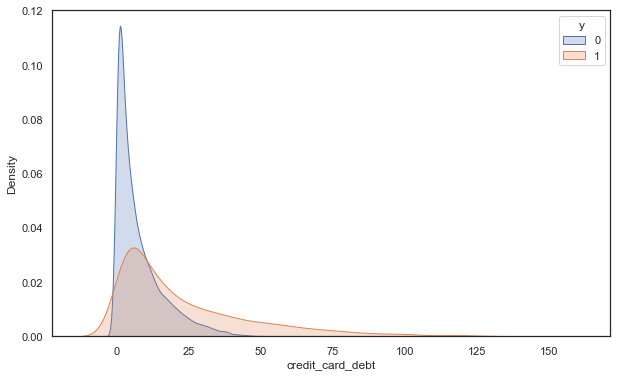

In [26]:
sns.kdeplot( data['credit_card_debt'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['credit_card_debt'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [27]:
data['credit_card_debt'].loc[data['y'] == 0].describe()

count    36548.000000
mean         7.810996
std          8.427304
min          0.005668
25%          1.651448
50%          4.724167
75%         11.125912
max         55.343899
Name: credit_card_debt, dtype: float64

In [28]:
data['credit_card_debt'].loc[data['y'] == 1].describe()

count    4640.000000
mean       23.489629
std        24.276876
min         0.056798
25%         5.807341
50%        14.527972
75%        33.632070
max       149.015859
Name: credit_card_debt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='other_debt', ylabel='Density'>

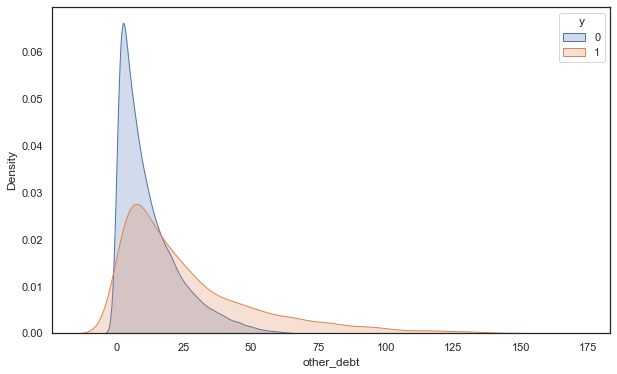

In [29]:
sns.kdeplot( data['other_debt'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['other_debt'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [30]:
data['other_debt'].loc[data['y'] == 0].describe()

count    36548.000000
mean        12.127154
std         11.343904
min          0.021759
25%          3.551734
50%          8.479551
75%         17.334192
max         68.666080
Name: other_debt, dtype: float64

In [31]:
data['other_debt'].loc[data['y'] == 1].describe()

count    4640.000000
mean       26.605214
std        26.301693
min         0.222414
25%         7.536917
50%        17.818418
75%        36.710018
max       159.198221
Name: other_debt, dtype: float64

# 3. Data Preparation

In [32]:
cat_vars=['education']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['education']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [33]:
data_final=data[to_keep]
data_final.drop(['loan_applicant_id'], axis=1, inplace=True)
data_final.columns.values

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'y', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'], dtype=object)

In [34]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_data_X,os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is ",len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 length of oversampled data is  48912
 Number of no default in oversampled data 24456
 Number of default 24456
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


In [35]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 9)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

[False  True False  True  True False  True  True  True  True  True  True]
[2 1 3 1 1 4 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
os_data_X.columns

Index(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [37]:
data_X1 = pd.DataFrame({
    'Feature': os_data_X.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
1,years_with_current_employer,1
3,household_income,1
4,debt_to_income_ratio,1
6,other_debt,1
7,education_basic,1
8,education_high.school,1
9,education_illiterate,1
10,education_professional.course,1
11,education_university.degree,1
0,age,2


In [38]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
    if data_X1["Importance"][i] == 1:
        cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['years_with_current_employer', 'household_income', 'debt_to_income_ratio', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree']
9


In [39]:
X=os_data_X[cols]
y=os_data_y['y']

# 4. Modeling

In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.269908
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.611     
Dependent Variable:      y                    AIC:                  26421.4504
Date:                    2021-10-12 01:51     BIC:                  26500.6304
No. Observations:        48912                Log-Likelihood:       -13202.   
Df Model:                8                    LL-Null:              -33903.   
Df Residuals:            48903                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [41]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
years_with_current_employer,5.019950e-25
household_income,0.000000e+00
debt_to_income_ratio,0.000000e+00
other_debt,2.369519e-167
education_basic,0.000000e+00
education_high.school,0.000000e+00
education_illiterate,0.000000e+00
education_professional.course,0.000000e+00
education_university.degree,0.000000e+00


In [42]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs 
print(pvs)
print(len(pvs))

['years_with_current_employer', 'household_income', 'debt_to_income_ratio', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree']
9


In [43]:
X=os_data_X[pvs]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269908
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                48912
Model:                          Logit   Df Residuals:                    48903
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.6106
Time:                        01:51:29   Log-Likelihood:                -13202.
converged:                       True   LL-Null:                       -33903.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
years_with_current_employer       0.0189      0.002     10.333      0.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# 5. Evaluation

In [45]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7860  169]
 [1350 6762]]


In [47]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  14622 correct predictions
 The result is telling us that we have:  1519 incorrect predictions
 We have a total predictions of:  16141


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8029
           1       0.98      0.83      0.90      8112

    accuracy                           0.91     16141
   macro avg       0.91      0.91      0.91     16141
weighted avg       0.91      0.91      0.91     16141



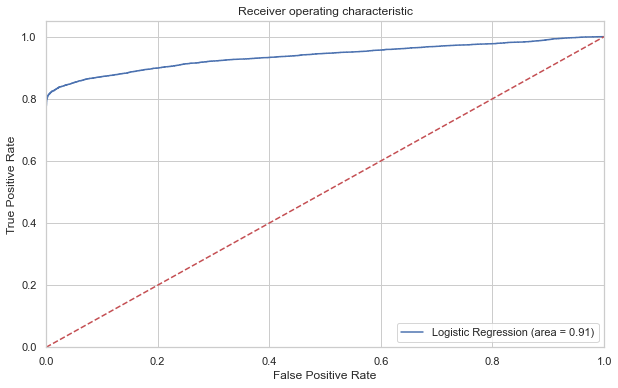

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 6. Deployment

In [50]:
data['PD'] = logreg.predict_proba(data[X_train.columns])[:,1]
data[['loan_applicant_id', 'PD']].head(10)

,loan_applicant_id,PD
0,191,0.206329
1,34318,0.041881
2,14932,0.201293
3,2776,0.749639
4,11915,0.239431
5,21925,0.439802
6,15110,0.034946
7,19944,0.061453
8,22850,0.422680
9,37927,0.008191


In [51]:
X_train.columns

Index(['years_with_current_employer', 'household_income',
       'debt_to_income_ratio', 'other_debt', 'education_basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree'],
      dtype='object')

In [52]:
new_data = np.array([3,57,14.26,2.993,0,1,0,0,0]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting on a new debt")

 This new loan applicant has a 4.19% chance of defaulting on a new debt
